<a href="https://colab.research.google.com/github/titika2013/Made_HPC/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

### На основании данных рейтинга top500 спрогнозировать  производительность компьютера №1 в 2025

In [3]:
readed_data = pd.read_excel("/content/TOP500_202206.xlsx")

In [4]:
readed_data.columns

Index(['Rank', 'Previous Rank', 'First Appearance', 'First Rank', 'Name',
       'Computer', 'Site', 'Manufacturer', 'Country', 'Year', 'Segment',
       'Total Cores', 'Accelerator/Co-Processor Cores', 'Rmax [TFlop/s]',
       'Rpeak [TFlop/s]', 'Nmax', 'Nhalf', 'HPCG [TFlop/s]', 'Power (kW)',
       'Power Source', 'Energy Efficiency [GFlops/Watts]', 'Memory',
       'Architecture', 'Processor', 'Processor Technology',
       'Processor Speed (MHz)', 'Operating System', 'OS Family',
       'Accelerator/Co-Processor', 'Cores per Socket', 'Processor Generation',
       'System Model', 'System Family', 'Interconnect Family', 'Interconnect',
       'Continent', 'Site ID', 'System ID'],
      dtype='object')

In [5]:
data = readed_data[
    ["Rank", "Name", 'Year', "Computer", "Total Cores", "Rmax [TFlop/s]", "Rpeak [TFlop/s]", "Power (kW)"]]


In [6]:
data.head()

,Rank,Name,Year,Computer,Total Cores,Rmax [TFlop/s],Rpeak [TFlop/s],Power (kW)
0,1,Frontier,2021,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",8730112,1102000.0,1685651.46,21100.00
1,2,Supercomputer Fugaku,2020,"Supercomputer Fugaku, A64FX 48C 2.2GHz, Tofu i...",7630848,442010.0,537212.00,29899.23
2,3,LUMI,2022,"HPE Cray EX235a, AMD Optimized 3rd Generation ...",1110144,151900.0,214351.87,2942.13
3,4,Summit,2018,"IBM Power System AC922, IBM POWER9 22C 3.07GHz...",2414592,148600.0,200794.88,10096.00
4,5,Sierra,2018,"IBM Power System AC922, IBM POWER9 22C 3.1GHz,...",1572480,94640.0,125712.00,7438.28


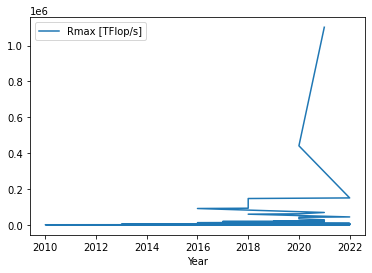

In [7]:
data.plot(y="Rmax [TFlop/s]", x="Year")

Исходя из графика, был сделан вывод что необходимы данные по годам.

In [8]:
history_url = 'https://raw.githubusercontent.com/dlenski/top500/master/TOP500_history.csv'  # где-то на github нашел данные
history_data = pd.read_csv(history_url, low_memory=False, parse_dates={'Date': ['Year', 'Month', 'Day']})

In [9]:
history_data.head()

,Date,Rank,Site,Manufacturer,Computer,Country,Processors,RMax,RPeak,Nmax,...,Accelerator/Co-Processor,Power Source,Rmax [TFlop/s],Rpeak [TFlop/s],HPCG [TFlop/s],Power (kW),Power Efficiency [GFlops/Watts],Site ID,System ID,Memory
0,1993-06-01,1.0,Los Alamos National Laboratory,Thinking Machines Corporation,CM-5/1024,United States,1024.0,59.7,131.00,52224.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-06-01,2.0,Minnesota Supercomputer Center,Thinking Machines Corporation,CM-5/544,United States,544.0,30.4,69.63,36864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-06-01,3.0,NCSA,Thinking Machines Corporation,CM-5/512,United States,512.0,30.4,65.54,36864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-06-01,4.0,National Security Agency,Thinking Machines Corporation,CM-5/512,United States,512.0,30.4,65.54,36864.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-06-01,5.0,NEC,NEC,SX-3/44R,Japan,4.0,23.2,25.60,6400.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
history_data = history_data[['Date', 'Rank', 'Computer', "RMax", "Rmax [TFlop/s]"]]
res_top_500 = history_data.groupby(['Date'], sort=False)['Rmax [TFlop/s]', "RMax"].max()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [11]:
res_top_500['RMax'] = res_top_500['RMax'].combine_first(res_top_500["Rmax [TFlop/s]"] * 10 ** 3)
res_top_500 = res_top_500.drop("Rmax [TFlop/s]", axis=1)
# последнее обновление добавил вручную
res_top_500.loc[pd.to_datetime('2022-06-01')] = [1.1e+09]
res_top_500.reset_index(inplace=True)

In [12]:
res_top_500.head()

,Date,RMax
0,1993-06-01,59.7
1,1993-11-01,124.0
2,1994-06-01,143.4
3,1994-11-01,170.0
4,1995-06-01,170.0


[None, Text(0, 0.5, 'GFlop/s'), Text(0.5, 0, 'Date')]

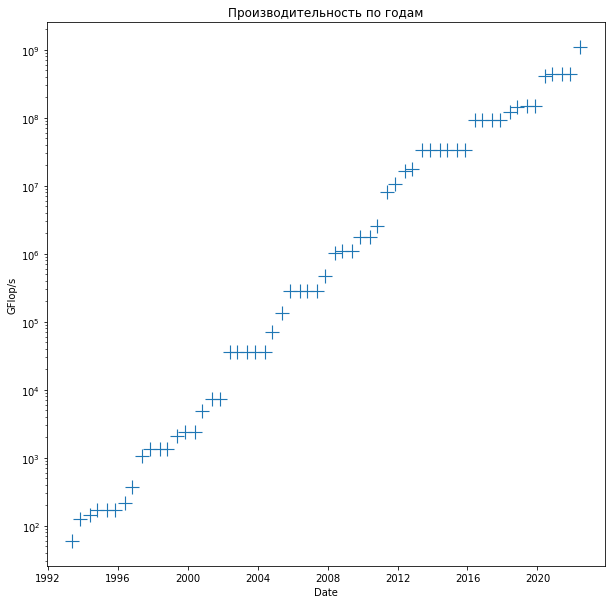

In [13]:
fig = plt.figure(figsize=(10, 10))
plt.title("Производительность по годам")
plt.style.use('dark_background')
grid = sns.scatterplot(x=res_top_500.Date, y=res_top_500.RMax, marker='+', s=200, palette="Accent")
grid.set(yscale="log", xlabel='Date', ylabel='GFlop/s')

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
y_train = res_top_500.RMax.to_numpy().reshape(-1, 1)
x_train = ((res_top_500['Date'] - res_top_500['Date'][0]).dt.days).to_numpy().reshape(-1, 1)

In [16]:
model = LinearRegression()
model.fit(x_train, np.log(y_train))
y_pred = np.exp(model.predict(x_train))

[None, Text(0, 0.5, 'GFlop/s'), Text(0.5, 0, 'Date')]

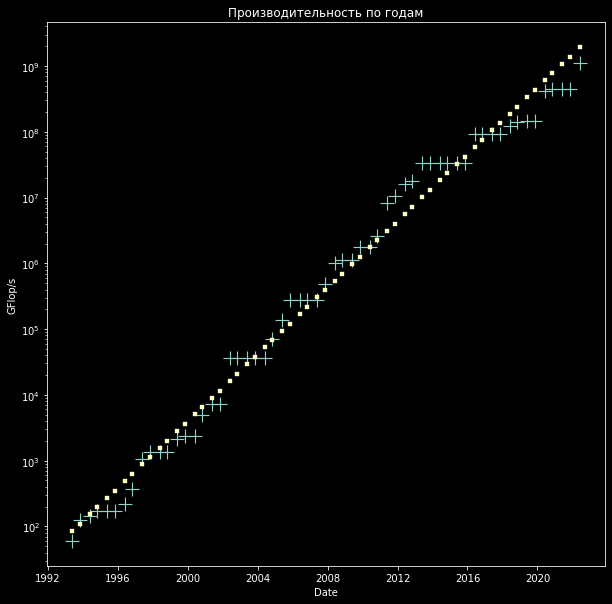

In [17]:
fig = plt.figure(figsize=(10, 10))
plt.title("Производительность по годам")
plt.style.use('dark_background')
grid = sns.scatterplot(x=res_top_500.Date, y=res_top_500.RMax, marker='+', s=200, palette="Accent")
grid = sns.scatterplot(x=res_top_500.Date, y=y_pred.flatten(), marker='s', s=20, palette="Accent")
grid.set(yscale="log", xlabel='Date', ylabel='GFlop/s')

In [18]:
target_day = (pd.Timestamp('2025-01-01') - res_top_500['Date'][0]).days
y_pred = np.exp(model.predict(np.array(target_day).reshape(-1, 1)))
print(f'{y_pred.flatten()[0] / 1e9:.4} EFlop/s')

8.884 EFlop/s


Ответ: на 2025-01-01 мощность составит 8.9 EFlop/s

## 2. Оцените какой процент всего производимого на Земле электричества потребляют все компьютеры из top500 (на основании открытых данных top500.org)

In [19]:
readed_data = pd.read_excel("/content/TOP500_202206.xlsx")
powers = readed_data['Power (kW)']

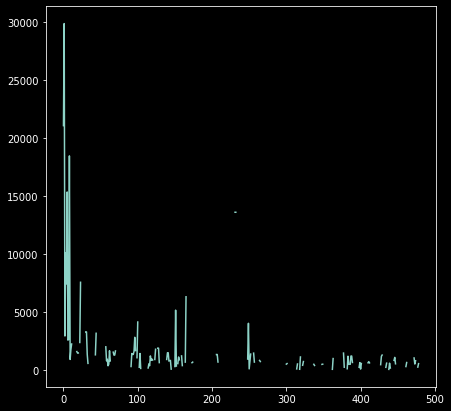

In [20]:
powers.plot(figsize=(7, 7))

In [21]:
powers.fillna(method='ffill', inplace=True)

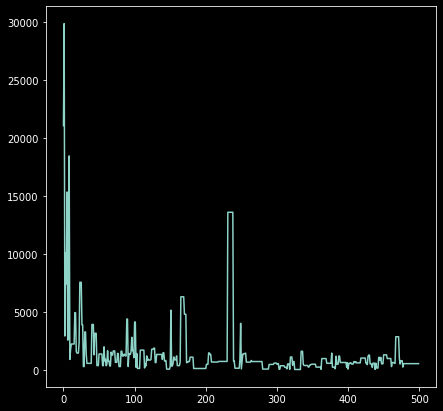

In [22]:
powers.plot(figsize=(7, 7))

Производство электроэнергии по всем источникам в мире равно 28214,07 ТВт·ч. Взято из https://ourworldindata.org/grapher/electricity-prod-source-stacked.

In [23]:
all_power = 28214.07e9
percents = ((powers.sum() * 8760 )/ all_power) * 100

In [24]:
print(
    f"Процент всего производимого на Земле электричествапотребляют все компьютеры из top500 "
    f"(на основании открытых данных top500.org) составяет {percents:.3f}%")

Процент всего производимого на Земле электричествапотребляют все компьютеры из top500 (на основании открытых данных top500.org) составяет 0.022%


Итого компьютеры из топ 500 потребляют 0.022% мирового электричества.